<a href="https://colab.research.google.com/github/erictleung/statistical-rethinking-book-club/blob/main/R/r_chapter02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install supporting packages
# install.packages(c("coda","mvtnorm","devtools","loo","dagitty","shape"))

# Install book specific packages
# remotes::install_github("stan-dev/cmdstanr")
# devtools::install_github("rmcelreath/rethinking")

In [2]:
# Code 2.1

# Ways to produce data (W) from W(ater) or L(and)
# 0 = [L L L L]
# 1 = [W L L L]
# 2 = [W W L L]
# 3 = [W W W L]
# 4 = [W W W W]
ways <- c(0, 3, 8, 9, 0)  # Ways to make sequence [W, L, W]
ways / sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

In [3]:
# Code 2.2

# Likelihood of data of six W's in nine tosses
# Binomial distribution https://en.wikipedia.org/wiki/Binomial_distribution
dbinom(6, size = 9, prob = 0.5)

[1] 0.1640625

In [6]:
# Code 2.3

# Grid approximation to approximate estimating a continous posterior
# distribution

# Define grid
p_grid <- seq(from = 0, to = 1, length.out = 20)
message("p_grid:")
print(p_grid)

# Define prior
prior <- rep(1, 20)
message("prior")
print(prior)

# Compute likelihood at each value in grid
likelihood <- dbinom(6, size = 9, prob = p_grid)
message("likelihood:")
print(likelihood)

# Compute product of likliehood and prior
unstd_posterior <- likelihood * prior

# Standardize the posterior, so it sums to 1
posterior <- unstd_posterior / sum(unstd_posterior)

p_grid:



 [1] 0.00000000 0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 [7] 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
[13] 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
[19] 0.94736842 1.00000000


prior



 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


likelihood:



 [1] 0.000000e+00 1.518149e-06 8.185093e-05 7.772923e-04 3.598575e-03
 [6] 1.116095e-02 2.668299e-02 5.292110e-02 9.082698e-02 1.383413e-01
[11] 1.897686e-01 2.361147e-01 2.666113e-01 2.714006e-01 2.450051e-01
[16] 1.897686e-01 1.179181e-01 5.026670e-02 8.853845e-03 0.000000e+00


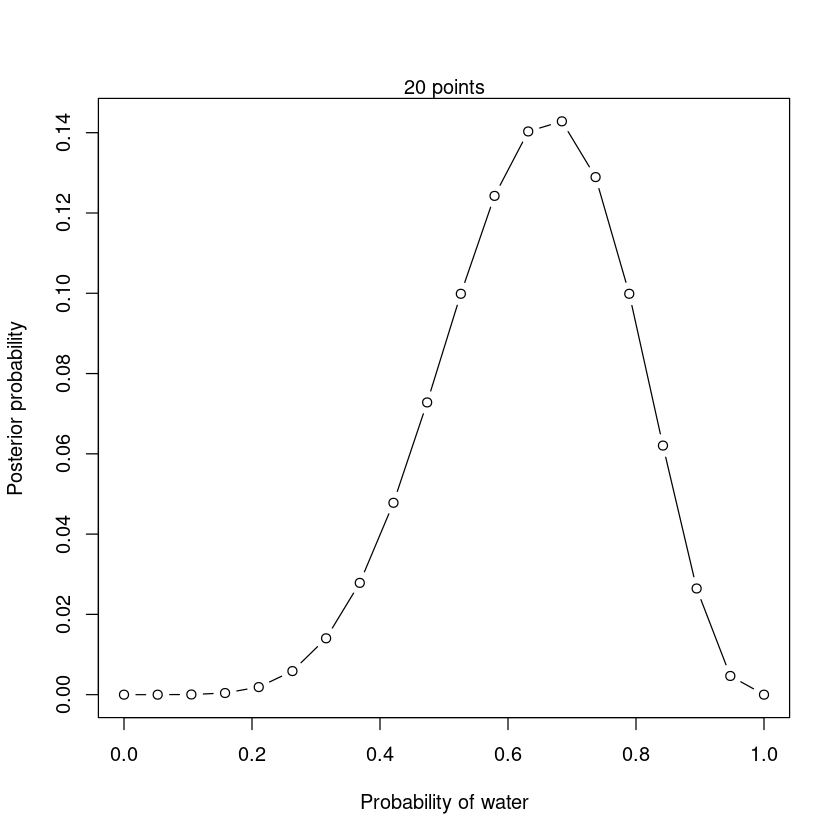

In [5]:
# Code 2.4
plot(
  p_grid,
  posterior,
  type = "b",
  xlab = "Probability of water",
  ylab = "Posterior probability"
)
mtext("20 points")